In [1]:
# Importing the necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the HTRU2 dataset
columns = [
    'Mean of the integrated profile', 'Standard deviation of the integrated profile',
    'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile',
    'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve',
    'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve', 'Class'
]


In [2]:
# Reading the dataset 
data = pd.read_csv('HTRU_2.csv', names=columns)

In [3]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
# Separate features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [7]:
# Split into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#The StandardScaler transforms the data such that each feature has a mean of 0 and a standard deviation of 1. 
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the number of nodes in each layer
DENSE1_SIZE = 24  # First dense layer
DENSE2_SIZE = 16  # Second dense layer
NUM_OF_EPOCHS = 10  # Simple model, not too many epochs needed
BATCH_SIZE = 8

# HTRU2 dataset: 8 input features
input_shape = X_train.shape[1]  # Assuming X_train is pre-processed

# Build the model
model =  tf.keras.Sequential()

model.add(tf.keras.layers.Dense(DENSE1_SIZE, activation='relu', input_shape=(input_shape,)))

# Hidden layers
model.add(tf.keras.layers.Dense(DENSE2_SIZE, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))  # Dropout to avoid overfitting

# Output layer for binary classification
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=NUM_OF_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)



Epoch 1/10
1432/1432 [==============================] - 8s 5ms/step - loss: 0.1108 - accuracy: 0.9712 - val_loss: 0.0719 - val_accuracy: 0.9752
Epoch 2/10
1432/1432 [==============================] - 11s 7ms/step - loss: 0.0832 - accuracy: 0.9787 - val_loss: 0.0706 - val_accuracy: 0.9780
Epoch 3/10
1432/1432 [==============================] - 10s 7ms/step - loss: 0.0777 - accuracy: 0.9790 - val_loss: 0.0680 - val_accuracy: 0.9791
Epoch 4/10
1432/1432 [==============================] - 9s 6ms/step - loss: 0.0774 - accuracy: 0.9790 - val_loss: 0.0695 - val_accuracy: 0.9797
Epoch 5/10
1432/1432 [==============================] - 9s 6ms/step - loss: 0.0758 - accuracy: 0.9782 - val_loss: 0.0660 - val_accuracy: 0.9787
Epoch 6/10
1432/1432 [==============================] - 11s 7ms/step - loss: 0.0768 - accuracy: 0.9786 - val_loss: 0.0655 - val_accuracy: 0.9794
Epoch 7/10
1432/1432 [==============================] - 6s 4ms/step - loss: 0.0758 - accuracy: 0.9792 - val_loss: 0.0646 - val_accura

In [10]:
print('Shape of X_train and X_test:', X_train.shape, X_test.shape)
print('Shape of y_train and y_test:', y_train.shape, y_test.shape)

Shape of X_train and X_test: (14318, 8) (3580, 8)
Shape of y_train and y_test: (14318,) (3580,)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 633
Trainable params: 633
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


112/112 [==============================] - 1s 3ms/step - loss: 0.0654 - accuracy: 0.9807
Test accuracy: 0.9807


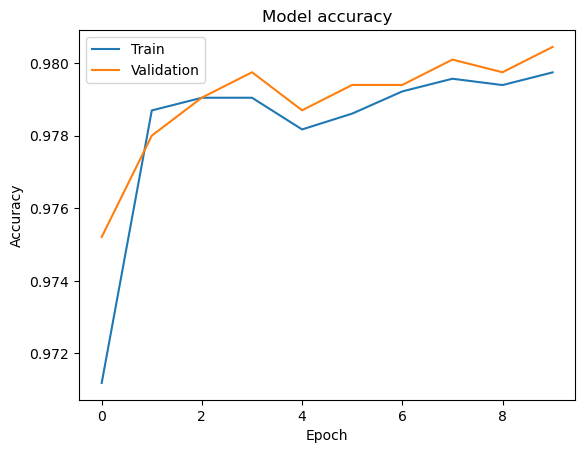

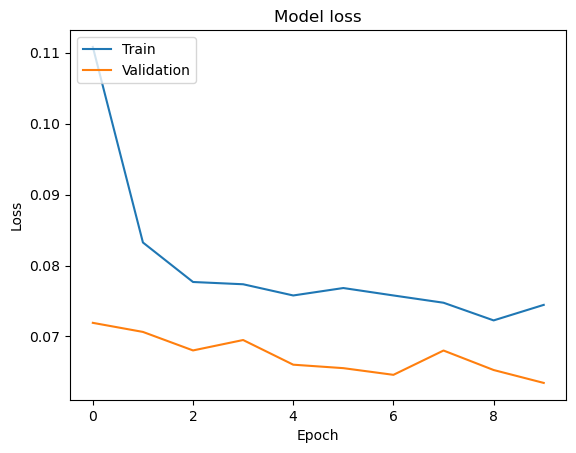

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


112/112 [==============================] - 1s 3ms/step
Confusion Matrix:
 [[3232   27]
 [  42  279]]


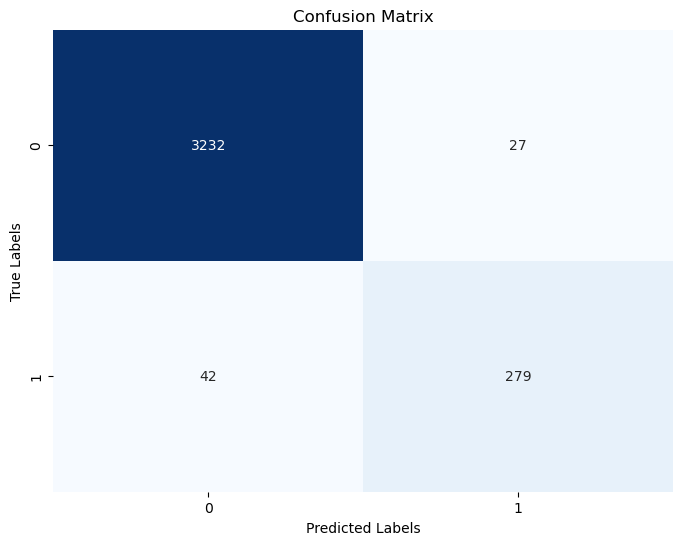

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [15]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.91      0.87      0.89       321

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [16]:
model.save('PolarNonPolarClassify.h5')

In [17]:
def representative_dataset():
    for _ in range(100):
      data =  X_test
      yield [data.astype(np.float32)]
        
print(representative_dataset())

<generator object representative_dataset at 0x00000278F3BEED48>


In [18]:
tf.saved_model.save(model, "IOT_PROJECT")
converter = tf.lite.TFLiteConverter.from_saved_model("IOT_PROJECT")

INFO:tensorflow:Assets written to: IOT_PROJECT\assets


In [19]:
import numpy as np
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

tflite_model = converter.convert()

In [20]:
with open('PolarNonPolarClassify.tflite', 'wb') as f:
  f.write(tflite_model)

In [21]:
interpreter = tf.lite.Interpreter(model_path="PolarNonPolarClassify.tflite")#loading the interpreter from 
interpreter.allocate_tensors()#allocating memory for computation

In [22]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_dense_input:0', 'index': 0, 'shape': array([1, 8]), 'shape_signature': array([-1,  8]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 10, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [23]:
import numpy as np
import tensorflow as tf

# Test the model on random input data
input_shape = input_details[0]['shape']  # Ensure this shape is compatible with HTRU2 dataset
print(input_shape)

# Generating random input data for HTRU2
input0_data = np.random.random_sample(input_shape)
print("Random Input Data:")
print(input0_data)

input0_data = np.array(input0_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input0_data)

interpreter.invoke()
output0_data = interpreter.get_tensor(output_details[0]['index'])
print("Output from TFLite Model for Random Data:")
print(output0_data)

# Verify if the same data is given to the original model what is the output
output0_data = model.predict(input0_data)
print("Output from Original Model for Random Data:")
print(output0_data)

# Define specific inputs based on HTRU2 dataset features
# Example Input1 (you may need to adjust the values based on your understanding of the dataset)
input1_data = [[136.5,49.9327673,0.044623267,-0.374311456,1.555183946,12.81353792,13.31433912,214.813089
]]  # Replace with actual meaningful values
print("Input 1 Data:")
print(input1_data)

input1_data = np.array(input1_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input1_data)

interpreter.invoke()
output1_data = interpreter.get_tensor(output_details[0]['index'])
print('Output 1 from TFLite Model:')
print(output1_data)

# Verify if the same data is given to the original model what is the output
output1_data = model.predict(input1_data)
print("Output 1 from Original Model:")
print(output1_data)

# Example Input2 (again, adjust values as necessary)
input2_data = [[124.5,57.35361802,-0.014849043,-0.550963937,4.783444816,27.50164045,6.090448645,37.81809112
]]  # Replace with actual meaningful values
print("Input 2 Data:")
print(input2_data)

input2_data = np.array(input2_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input2_data)

interpreter.invoke()
output2_data = interpreter.get_tensor(output_details[0]['index'])
print('Output 2 from TFLite Model:')
print(output2_data)

# Verify if the same data is given to the original model what is the output
output2_data = model.predict(input2_data)
print("Output 2 from Original Model:")
print(output2_data)


[1 8]
Random Input Data:
[[0.47765279 0.74494603 0.79944441 0.55473726 0.93217591 0.29323354
  0.89976772 0.62770593]]
Output from TFLite Model for Random Data:
[[0.6064476]]
1/1 [==============================] - 0s 45ms/step
Output from Original Model for Random Data:
[[0.60644764]]
Input 1 Data:
[[136.5, 49.9327673, 0.044623267, -0.374311456, 1.555183946, 12.81353792, 13.31433912, 214.813089]]
Output 1 from TFLite Model:
[[0.]]
1/1 [==============================] - 0s 63ms/step
Output 1 from Original Model:
[[0.]]
Input 2 Data:
[[124.5, 57.35361802, -0.014849043, -0.550963937, 4.783444816, 27.50164045, 6.090448645, 37.81809112]]
Output 2 from TFLite Model:
[[0.]]
1/1 [==============================] - 0s 41ms/step
Output 2 from Original Model:
[[0.]]


In [24]:
# Function to convert some hex values into an array for C programming
import time, sys

# Function to convert some hex values into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Mouli Sankaran \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(sys.version) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", sys.version, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(NUM_OF_EPOCHS) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(BATCH_SIZE) + '\n*/\n'
    
# Generate 'C' constants for the no. of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(DENSE1_SIZE) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(DENSE2_SIZE) + ';\n'      
    
    # Add array length at the top of the file
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'alignas(8) const unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formating so each line stays within 80 characters
        if (i + 1) < len(hex_data):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [25]:
# Write TFLite model to a C source (or header) file
with open("PolarNonPolarClassify_model" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "PolarNonPolarClassify_model"))

This model data was generated on: Tue Nov 19 09:56:34 2024
Tools used: Python: 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)] 
 Numpy: 1.21.6 
 TensorFlow: 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)] 
 Keras:  2.10.0 


